In [ ]:
# お手本のQiita記事
# http://tkzs.hatenablog.com/entry/2015/09/25/035433
# https://qiita.com/ctgk/items/555802600638f41b40c5

In [39]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# 表示桁数を設定
%precision %08.2f


'%08.2f'

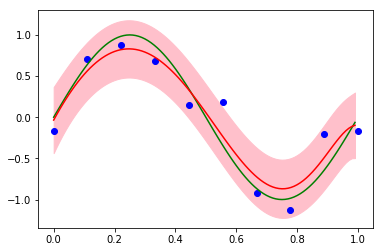

In [179]:
###############################
# 各関数
###############################

# From p31 the auther define phi as following
# 計画行列(特徴点ベクトルの行列)
def phi(x):
    return np.array([x**i for i in range(M+1)]).reshape((M+1, 1))

# (1.70) Mean of predictive distribution
# 予測分布が、この平均を持つガウス分布に従うことがわかってる
def m(x, x_train, y_train, S):
    sum = np.zeros((M+1, 1))
    for n in range(len(x_train)):
        sum += np.dot(phi(x_train[n]), y_train[n])
    return Beta * phi(x).T.dot(S).dot(sum)

# (1.71) Variance of predictive distribution   
# 予測分布が、この分散を持つガウス分布に従うことがわかってる
def s2(x, S):
    return 1.0/Beta + phi(x).T.dot(S).dot(phi(x))

# (1.72)
# 計算上必要なヤツ
def S(x_train, y_train):
    I = np.identity(M+1)
    Sigma = np.zeros((M+1, M+1))
    for n in range(len(x_train)):
        Sigma += np.dot(phi(x_train[n]), phi(x_train[n]).T)
    S_inv = alpha*I + Beta*Sigma
    S = np.linalg.inv(S_inv)
    return S


###############################
# データを用意
###############################
# 固定するパラメータ(図1.17の再現を目指すので、そこを参照)
alpha = 0.005
Beta = 11.1
M = 9

# 正解データ かつ x_realは学習データ(x_realの各点から、y_realを予測する)
x_real = np.arange(0, 1, 0.01)
# [0.   0.01 0.02 0.03 0.04 0.05 ...
y_real = np.sin(2*np.pi*x_real)
# [ 0.000e+00  6.279e-02  1.253e-01  1.874e-01  ...

## 訓練データ 食べさせるデータ
x_train = np.linspace(0, 1, 10)
# [0.    0.111 0.222 0.333 0.444 0.556 0.667 0.778 0.889 1.   ]
# y_realと違って、ちょっとのいず乗せる
y_train =  np.sin(2*np.pi*x_train) + np.random.normal(0, 0.3, 10)
# [ 0.406  0.616  0.75   1.216  0.223 -0.153 -1.419 -1.43  -1.09   0.383]



###############################
# 予測分布の算出
###############################
S = S(x_train, y_train)
# x_realからxを1個ずつ借りてきて、新しいデータとして予測に使う
# (そうすれば、「『予測の結果meanとs2』から求められる予測分布」と
# y_real(正解)との比較ができる)
# つまりx_realの100点に対して、それぞれmeanが100点、s2が100点求まる
mean = [m(x, x_train, y_train, S)[0,0] for x in x_real]
variance = [s2(x, S)[0,0] for x in x_real]

# 予測分布描画のために必要な情報
SD = np.sqrt(variance)
upper = mean + SD
lower = mean - SD


###############################
# 予測分布を描画
###############################
plt.plot(x_train, y_train, 'bo') # 訓練データを青点
plt.plot(x_real, y_real, 'g-') # 正解データを緑線

plt.plot(x_real, mean, 'r-') # 予測データを赤線
plt.fill_between(x_real, upper, lower, color='pink') # 予測データの分散
# xlim(0.0, 1.0)
# ylim(-2, 2)
# title("Figure 1.17")